In [25]:
#import some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression



In [26]:
#import data
dataset = pd.read_csv('MLB_data.csv')

In [27]:
dataset.head()



,Unnamed: 0,Player ID,First Name,Last Name,Year,AB,H,HR,RBI,SO,POS,Adjusted Salary,BA
0,63,abreubo01,Bobby,Abreu,1999,546,183,20,93.0,113.0,OF,576247,0.335
1,64,abreubo01,Bobby,Abreu,2000,576,182,25,79.0,116.0,OF,4088388,0.316
2,65,abreubo01,Bobby,Abreu,2001,588,170,31,110.0,137.0,OF,6752992,0.289
3,66,abreubo01,Bobby,Abreu,2002,572,176,20,85.0,117.0,OF,8449384,0.308
4,67,abreubo01,Bobby,Abreu,2003,577,173,20,101.0,126.0,OF,11869911,0.300


In [28]:
#get dummies for position

dataset = pd.get_dummies(dataset, columns=["POS"])
dataset.head()

,Unnamed: 0,Player ID,First Name,Last Name,Year,AB,H,HR,RBI,SO,Adjusted Salary,BA,POS_1B,POS_2B,POS_3B,POS_C,POS_OF,POS_SS
0,63,abreubo01,Bobby,Abreu,1999,546,183,20,93.0,113.0,576247,0.335,0,0,0,0,1,0
1,64,abreubo01,Bobby,Abreu,2000,576,182,25,79.0,116.0,4088388,0.316,0,0,0,0,1,0
2,65,abreubo01,Bobby,Abreu,2001,588,170,31,110.0,137.0,6752992,0.289,0,0,0,0,1,0
3,66,abreubo01,Bobby,Abreu,2002,572,176,20,85.0,117.0,8449384,0.308,0,0,0,0,1,0
4,67,abreubo01,Bobby,Abreu,2003,577,173,20,101.0,126.0,11869911,0.300,0,0,0,0,1,0


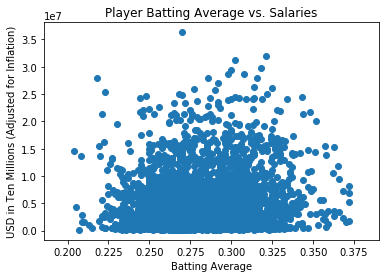

In [29]:
plt.scatter(dataset["BA"],dataset["Adjusted Salary"])

plt.title("Player Batting Average vs. Salaries")
plt.ylabel("USD in Ten Millions (Adjusted for Inflation)")
plt.xlabel("Batting Average")

plt.savefig("Output_Plots/average_vs_salary.png")
plt.show()

In [30]:
#plt.scatter(dataset["AB"],dataset["Adjusted Salary"])

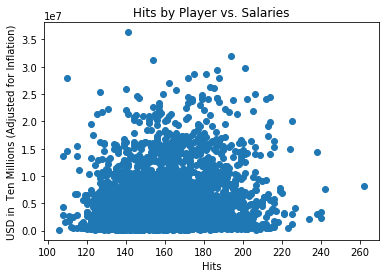

In [31]:
plt.scatter(dataset["H"],dataset["Adjusted Salary"])

plt.title("Hits by Player vs. Salaries")
plt.ylabel("USD in  Ten Millions (Adjusted for Inflation)")
plt.xlabel("Hits")

plt.savefig("Output_Plots/hits_vs_salary.png")
plt.show()

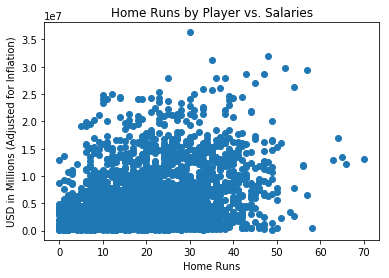

In [32]:
plt.scatter(dataset["HR"],dataset["Adjusted Salary"])
plt.title("Home Runs by Player vs. Salaries")
plt.ylabel("USD in Millions (Adjusted for Inflation)")
plt.xlabel("Home Runs")

plt.savefig("Output_Plots/dingers_vs_salary.png")
plt.show()

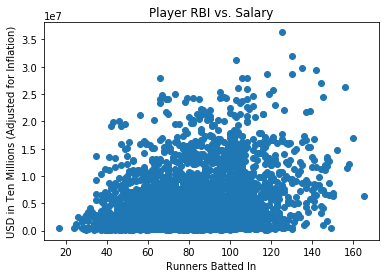

In [33]:
plt.scatter(dataset["RBI"],dataset["Adjusted Salary"])

plt.title("Player RBI vs. Salary")
plt.ylabel("USD in Ten Millions (Adjusted for Inflation)")
plt.xlabel("Runners Batted In")

plt.savefig("Output_Plots/rbis_vs_salary.png")
plt.show()

In [34]:
#plt.scatter(dataset["SO"],dataset["Adjusted Salary"])

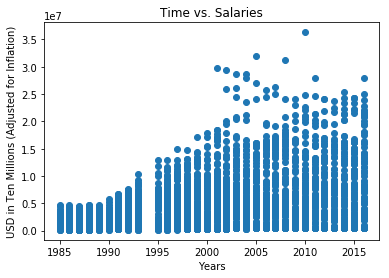

In [35]:
plt.scatter(dataset["Year"],dataset["Adjusted Salary"])
#save this .. This is interesting 
plt.title("Time vs. Salaries")
plt.ylabel("USD in Ten Millions (Adjusted for Inflation)")
plt.xlabel("Years")

plt.savefig("Output_Plots/Salary_over_time.png")
plt.show()

In [36]:
X = dataset[["H", "HR", "RBI", "BA", "SO", "POS_1B", "POS_2B", "POS_3B", "POS_SS", "POS_OF", "POS_C" ]]  
y = dataset["Adjusted Salary"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3028, 11) (3028, 1)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_test.shape

(757, 11)

In [38]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/envs/pythondatapython=3.6/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/pythondatapython=3.6/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/pythondatapython=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/envs/pythondatapython=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/envs/pythondatapython=3.6/lib/python3.7/site-packages/sklearn/utils/validati

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(training_score)
print(testing_score)

0.13568408292275747
0.04940425757201705


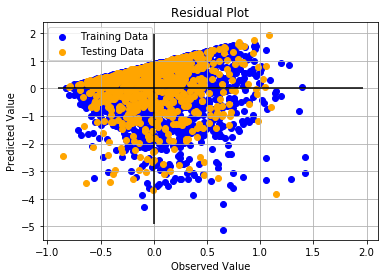

In [41]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.vlines(x=0, ymin=y_test_scaled.min()-4, ymax=y_test_scaled.max() -3 )
plt.hlines(y=0, xmin=y_test_scaled.min() , xmax=y_test_scaled.max() -3)



plt.ylabel("Predicted Value")
plt.xlabel("Observed Value")
plt.grid(True)

plt.savefig("Output_Plots/Residual_Plot.png")
plt.title("Residual Plot")
plt.show()




In [42]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6312554121488.756, R2: 0.04940425757201705


In [43]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8534746345033668, R2: 0.04940458276155512


In [44]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8508747155400537, R2: 0.05230035839659186
